### Supervised Learning - Churn Prediction Classifier

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# data partition
from sklearn.model_selection import train_test_split

#filter methods
# chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

# embedded methods
from sklearn.linear_model import LassoCV

import warnings
warnings.filterwarnings('ignore')

#### 1.1 Load the training set and make select the index

In [2]:
df_train = pd.read_csv('datasets/train.csv')
df_train.set_index('Cust_ID', inplace = True)
df_train

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,churn,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,nochurn,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,churn,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,nochurn,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,nochurn,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,churn,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,3,2,4,3,4,5,1,3,4,3
15586,churn,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,5,3,5,5,3,1,3,4,4,5
15587,nochurn,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,3,4,5,4,4,4,4,5,4,4


#### 1.2 Load the training set and make select the index

In [3]:
df_test = pd.read_csv('datasets/test.csv')
df_test.set_index('Cust_ID', inplace = True)
df_test

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,2,1,2,1,1,5,3,4,4,4,1
30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,1,4,2,4,4,4,5,4,3,1,4
30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,3,2,4,1,2,5,5,5,3,4,2
30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,3,3,4,3,3,3,5,5,3,4,3
30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,2,5,4,3,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,yes,1959,business,single,6743,2,3,3,3,2,3,3,2,2,3,2,3,2,4
35191,Mr. Tim Martinez,yes,1971,business,double,5965,5,2,2,2,5,5,5,5,3,2,3,4,1,5
35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,1,3,3,3,3,3,4,4,1,3,3


#### 1.3 Encode the target variable (Churn)

In [4]:
df_train['Churn'] = np.where(df_train['Churn'] == 'churn', 1, 0)
df_train.head()

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Wifi,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,4,3,4,3,3,3,3,4,3,4
2,0,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,5,3,4,5,5,5,5,1,5,2
3,1,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,1,4,4,3,3,2,3,2,3,1
4,0,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,4,5,4,4,4,4,4,4,3
5,0,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,5,3,4,1,3,5


#### 1.4 Check features

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15589 entries, 1 to 15589
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Churn              15589 non-null  int64  
 1   Name               15589 non-null  object 
 2   Longevity          15589 non-null  object 
 3   Year_Birth         15394 non-null  float64
 4   TypeTravel         15589 non-null  object 
 5   RoomType           15589 non-null  object 
 6   RewardPoints       15589 non-null  int64  
 7   Comfort            15589 non-null  int64  
 8   ReceptionSchedule  15589 non-null  int64  
 9   FoodDrink          15589 non-null  int64  
 10  Location           15589 non-null  int64  
 11  Wifi               15589 non-null  int64  
 12  Amenities          15589 non-null  int64  
 13  Staff              15589 non-null  int64  
 14  OnlineBooking      15589 non-null  int64  
 15  PriceQuality       15589 non-null  int64  
 16  RoomSpace          155

* Name, Year_Birth, TypeTravel and RoomType are categorical variables. \
* All the other are integers.\
* However we have to check the variables containing the review scores per client.

#### 1.5 Check the values of categorical variables

In [6]:
df_train['Longevity'].value_counts()

yes    12548
no      2874
y        167
Name: Longevity, dtype: int64

The y value will be converted into yes.

In [7]:
df_train['RoomType'].value_counts()

single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64

In [8]:
df_train['TypeTravel'].value_counts()

business    10756
leisure      4833
Name: TypeTravel, dtype: int64

#### 1.6 Check the values of review score variables

In [9]:
df_train.columns
review = df_train.columns[7:-1]
review

Index(['Comfort', 'ReceptionSchedule', 'FoodDrink', 'Location', 'Wifi',
       'Amenities', 'Staff', 'OnlineBooking', 'PriceQuality', 'RoomSpace',
       'CheckOut', 'Checkin', 'Cleanliness'],
      dtype='object')

In [10]:
for i in review:
    print(i)
    print(df_train[i].value_counts())
    print('')

Comfort
3    3499
4    3475
2    3452
1    2487
5    2102
0     574
Name: Comfort, dtype: int64

ReceptionSchedule
4    3634
5    3172
3    2798
2    2725
1    2484
0     776
Name: ReceptionSchedule, dtype: int64

FoodDrink
3    3406
4    3325
2    3283
1    2490
5    2354
0     731
Name: FoodDrink, dtype: int64

Location
3    4085
4    3607
2    2957
1    2687
5    2253
Name: Location, dtype: int64

Wifi
4    3704
5    3446
3    3348
2    3245
1    1792
6      36
0      18
Name: Wifi, dtype: int64

Amenities
4    4962
5    3585
3    2932
2    2307
1    1427
0     376
Name: Amenities, dtype: int64

Staff
4    4833
5    4317
3    2599
2    2107
1    1733
Name: Staff, dtype: int64

OnlineBooking
4    4696
5    4055
3    2781
2    2391
1    1664
0       2
Name: OnlineBooking, dtype: int64

PriceQuality
4    4865
5    3763
3    3346
2    2005
1    1610
Name: PriceQuality, dtype: int64

RoomSpace
4    4786
5    4045
3    2701
2    2624
1    1387
0      46
Name: RoomSpace, dtype: int64

Chec

* The Wifi feature has a value of 6 when the maximum value allowed for this variable is 5. \
* We will replace these values with the mode.

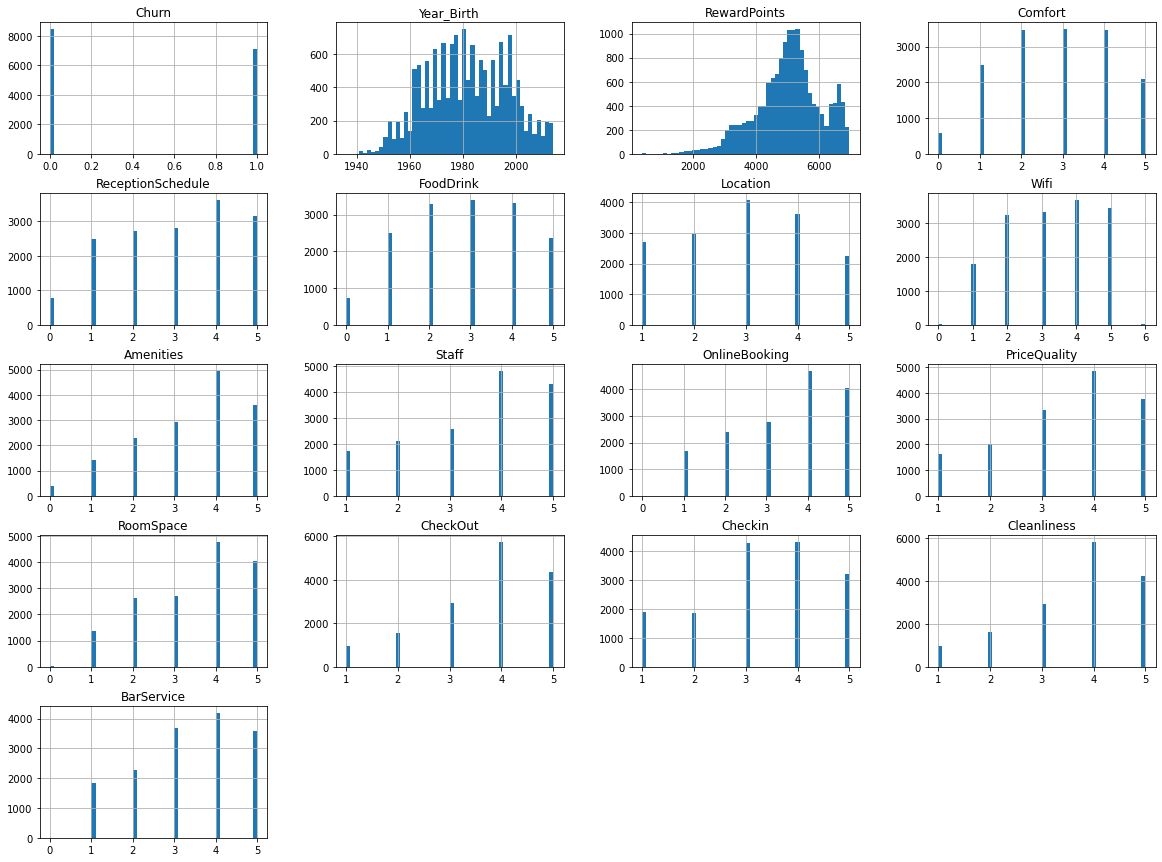

In [11]:
%matplotlib inline
df_train.hist(bins = 50, figsize = (20, 15))
plt.show()

<AxesSubplot:>

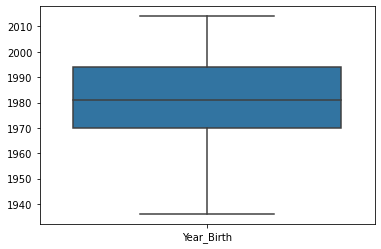

In [12]:
sns.boxplot(data = df_train[['Year_Birth']])

<AxesSubplot:>

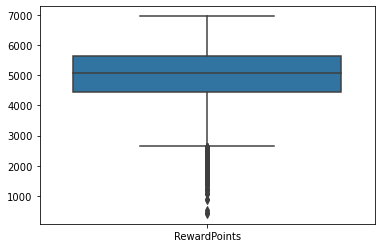

In [13]:
sns.boxplot(data = df_train[['RewardPoints']])

<AxesSubplot:xlabel='RewardPoints', ylabel='Year_Birth'>

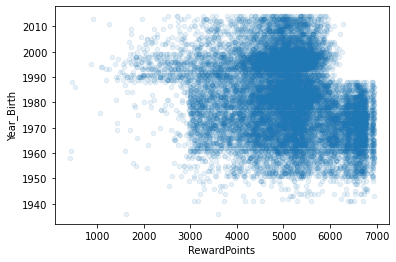

In [14]:
df_train.plot(kind = "scatter", x = "RewardPoints", y = "Year_Birth", alpha = 0.1)

#### 1.7 Create a Gender variable for both training and test set

In [15]:
df_train['prefix'] = df_train['Name'].str[0:2]
df_train['Gender'] = np.where(df_train['prefix']!= 'Mr', 1, 0)
df_train.drop('prefix', axis = 1, inplace = True)
df_train

,Churn,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,1974.0,business,single,4907,3,4,1,...,3,4,3,3,3,3,4,3,4,1
2,0,Mr. Jesse Scott,yes,1965.0,business,single,6724,1,1,1,...,3,4,5,5,5,5,1,5,2,0
3,1,Mr. Christopher Carter,yes,1973.0,business,single,4365,3,3,3,...,4,4,3,3,2,3,2,3,1,0
4,0,Ms. Jennifer Morgan,yes,1993.0,leisure,double,3849,1,1,1,...,4,5,4,4,4,4,4,4,3,1
5,0,Mr. Michael White,yes,1989.0,business,single,5376,2,2,3,...,5,5,5,5,3,4,1,3,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,no,1988.0,business,double,4968,2,0,2,...,2,4,3,4,5,1,3,4,3,1
15586,1,Ms. Sonya Smith,no,2000.0,business,double,4970,3,3,3,...,3,5,5,3,1,3,4,4,5,1
15587,0,Mr. Maxwell Wright,yes,1964.0,business,single,4046,1,1,1,...,4,5,4,4,4,4,5,4,4,0


In [16]:
df_test['prefix'] = df_test['Name'].str[0:2]
df_test['Gender'] = np.where(df_test['prefix']!= 'Mr', 1, 0)
df_test.drop('prefix', axis = 1, inplace = True)
df_test

,Name,Longevity,Year_Birth,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Amenities,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender
Cust_ID,,,,,,,,,,,,,,,,,,,,,
30000,Mr. Brandon Aguirre,yes,1956,leisure,double,5584,2,4,2,2,...,2,1,1,5,3,4,4,4,1,0
30001,Mr. Mathew Howard,yes,2004,leisure,double,5970,2,4,2,1,...,2,4,4,4,5,4,3,1,4,0
30002,Mr. Brian Peters,no,1992,business,single,5122,5,4,4,3,...,4,1,2,5,5,5,3,4,2,0
30003,Mr. Robert Henderson,yes,1986,leisure,double,5297,4,5,4,3,...,4,3,3,3,5,5,3,4,3,0
30004,Ms. Stephanie Drake,yes,1970,business,double,6047,4,2,2,2,...,4,3,4,4,4,4,4,4,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35190,Ms. Jamie Benjamin,yes,1959,business,single,6743,2,3,3,3,...,3,3,2,2,3,2,3,2,4,1
35191,Mr. Tim Martinez,yes,1971,business,double,5965,5,2,2,2,...,5,5,5,3,2,3,4,1,5,0
35192,Mr. Michael Webb,yes,1954,business,double,5373,3,1,1,1,...,3,3,3,3,4,4,1,3,3,0


#### 1.8 Create the variable Age

In [17]:
from datetime import date
df_train['Age'] = date.today().year - df_train['Year_Birth'] # define a new variable called Age
df_train.drop('Year_Birth', axis = 1, inplace = True)
df_train['Age'] = df_train['Age'].apply(np.floor)
df_train

,Churn,Name,Longevity,TypeTravel,RoomType,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,...,Staff,OnlineBooking,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age
Cust_ID,,,,,,,,,,,,,,,,,,,,,
1,1,Ms. Nicole Clarke,yes,business,single,4907,3,4,1,4,...,4,3,3,3,3,4,3,4,1,48.0
2,0,Mr. Jesse Scott,yes,business,single,6724,1,1,1,1,...,4,5,5,5,5,1,5,2,0,57.0
3,1,Mr. Christopher Carter,yes,business,single,4365,3,3,3,3,...,4,3,3,2,3,2,3,1,0,49.0
4,0,Ms. Jennifer Morgan,yes,leisure,double,3849,1,1,1,1,...,5,4,4,4,4,4,4,3,1,29.0
5,0,Mr. Michael White,yes,business,single,5376,2,2,3,2,...,5,5,5,3,4,1,3,5,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15585,1,Ms. Wendy Roberts,no,business,double,4968,2,0,2,2,...,4,3,4,5,1,3,4,3,1,34.0
15586,1,Ms. Sonya Smith,no,business,double,4970,3,3,3,3,...,5,5,3,1,3,4,4,5,1,22.0
15587,0,Mr. Maxwell Wright,yes,business,single,4046,1,1,1,1,...,5,4,4,4,4,5,4,4,0,58.0


#### 1.9 Transform Categorical variables

##### Longevity

In [18]:
df_train['Longevity'] = df_train['Longevity'].replace('y', 'yes')
df_test['Longevity'] = df_test['Longevity'].replace('y', 'yes')
print('Training Set')
print(df_train['Longevity'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['Longevity'].value_counts())

Training Set
yes    12715
no      2874
Name: Longevity, dtype: int64
***********************************
Test Set
yes    4267
no      928
Name: Longevity, dtype: int64


In [19]:
df_train['Longevity'] = np.where(df_train['Longevity'] != 'yes', 1, 0)
df_test['Longevity'] = np.where(df_test['Longevity'] != 'yes', 1, 0)
print('Training Set')
print(df_train['Longevity'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['Longevity'].value_counts())

Training Set
0    12715
1     2874
Name: Longevity, dtype: int64
***********************************
Test Set
0    4267
1     928
Name: Longevity, dtype: int64


##### Type of Travel

In [20]:
df_train['TypeTravel'] = np.where(df_train['TypeTravel'] != 'leisure', 1, 0)
df_test['TypeTravel'] = np.where(df_test['TypeTravel'] != 'leisure', 1, 0)
print('Training Set')
print(df_train['TypeTravel'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['TypeTravel'].value_counts())

Training Set
1    10756
0     4833
Name: TypeTravel, dtype: int64
***********************************
Test Set
1    3512
0    1683
Name: TypeTravel, dtype: int64


##### Room Type

In [21]:
df_train_tree = df_train.copy()
df_test_tree = df_test.copy()

##### Make sure we can do this to test set

In [22]:
df_train['Single'] = np.where(df_train['RoomType'] == 'single', 1, 0)
df_train['Double'] = np.where(df_train['RoomType'] == 'double', 1, 0)
df_test['Single'] = np.where(df_test['RoomType'] == 'single', 1, 0)
df_test['Double'] = np.where(df_test['RoomType'] == 'double', 1, 0)

print('Training Set')
print(df_train['RoomType'].value_counts())

print('***********************************')
print('Test Set')
print(df_test['RoomType'].value_counts())

print('***********************************')
print('Training Set')
print('Single')
print(df_train['Single'].value_counts())
print('Double')
print(df_train['Double'].value_counts())

print('***********************************')
print('Test Set')
print('Single')
print(df_test['Single'].value_counts())
print('Double')
print(df_test['Double'].value_counts())

Training Set
single    7442
double    7021
suite     1126
Name: RoomType, dtype: int64
***********************************
Test Set
single    2398
double    2392
suite      405
Name: RoomType, dtype: int64
***********************************
Training Set
Single
0    8147
1    7442
Name: Single, dtype: int64
Double
0    8568
1    7021
Name: Double, dtype: int64
***********************************
Test Set
Single
0    2797
1    2398
Name: Single, dtype: int64
Double
0    2803
1    2392
Name: Double, dtype: int64


In [23]:
### Train set

df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'single', 1, df_train_tree['RoomType'])
df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'double', 2, df_train_tree['RoomType'])
df_train_tree['RoomType'] = np.where(df_train_tree['RoomType'] == 'suite', 3, df_train_tree['RoomType'])

### Test Set
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'single', 1, df_test_tree['RoomType'])
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'double', 2, df_test_tree['RoomType'])
df_test_tree['RoomType'] = np.where(df_test_tree['RoomType'] == 'suite', 3, df_test_tree['RoomType'])

print('Training Set')
print(df_train_tree['RoomType'].value_counts())

print('***********************************')
print('Test Set')
print(df_test_tree['RoomType'].value_counts())


Training Set
1    7442
2    7021
3    1126
Name: RoomType, dtype: int64
***********************************
Test Set
1    2398
2    2392
3     405
Name: RoomType, dtype: int64


<AxesSubplot:>

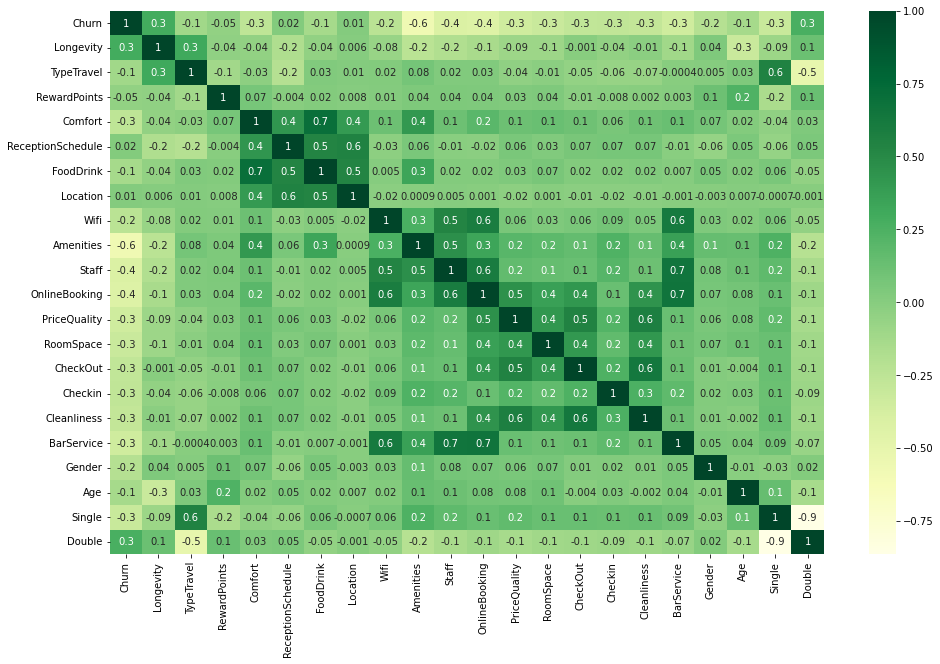

In [27]:
corr = df_train.corr(method = 'spearman')
figure = plt.figure(figsize = (16, 10))
sns.heatmap(corr, cmap = 'YlGn',annot = True, fmt = '.1g')

### 2. Data Partition

#### 2.1 Define the independent and dependent variables

In [28]:
X = df_train.drop('Churn', axis = 1) # drop the target variable
y = df_train['Churn']

#### 2.2 Divide the training set in training and validation set

In [29]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 0 \
                                                   ,stratify = y, shuffle = True)

We decided to divide the training set into the train and validation set by 70% train and 30% validation.
We used the sratified sampling method in order to preserve class representation in both training and validation sets.

#### 1.5 Check missing values in the newly formed subsets

In [30]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10912 entries, 739 to 876
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               10912 non-null  object 
 1   Longevity          10912 non-null  int64  
 2   TypeTravel         10912 non-null  int64  
 3   RoomType           10912 non-null  object 
 4   RewardPoints       10912 non-null  int64  
 5   Comfort            10912 non-null  int64  
 6   ReceptionSchedule  10912 non-null  int64  
 7   FoodDrink          10912 non-null  int64  
 8   Location           10912 non-null  int64  
 9   Wifi               10912 non-null  int64  
 10  Amenities          10912 non-null  int64  
 11  Staff              10912 non-null  int64  
 12  OnlineBooking      10912 non-null  int64  
 13  PriceQuality       10912 non-null  int64  
 14  RoomSpace          10912 non-null  int64  
 15  CheckOut           10912 non-null  int64  
 16  Checkin            109

In [31]:
X_train.describe()

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
count,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,...,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10912.000000,10777.000000,10912.000000,10912.000000
mean,0.186217,0.692724,5024.555535,2.839443,2.992944,2.844208,2.971957,3.242027,3.375367,3.505224,...,3.459219,3.466001,3.702713,3.324139,3.692632,3.343017,0.509714,40.313445,0.479014,0.447214
std,0.389300,0.461386,1025.328877,1.389656,1.517335,1.438985,1.299289,1.329357,1.357015,1.319110,...,1.266586,1.291363,1.155795,1.271881,1.150609,1.301884,0.499929,15.175089,0.499582,0.497229
min,0.000000,0.000000,409.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,8.000000,0.000000,0.000000
25%,0.000000,0.000000,4455.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,28.000000,0.000000,0.000000
50%,0.000000,1.000000,5098.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000,1.000000,41.000000,0.000000,0.000000
75%,0.000000,1.000000,5643.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,52.000000,1.000000,1.000000
max,1.000000,1.000000,6950.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,81.000000,1.000000,1.000000


In [32]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 2425 to 7492
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4677 non-null   object 
 1   Longevity          4677 non-null   int64  
 2   TypeTravel         4677 non-null   int64  
 3   RoomType           4677 non-null   object 
 4   RewardPoints       4677 non-null   int64  
 5   Comfort            4677 non-null   int64  
 6   ReceptionSchedule  4677 non-null   int64  
 7   FoodDrink          4677 non-null   int64  
 8   Location           4677 non-null   int64  
 9   Wifi               4677 non-null   int64  
 10  Amenities          4677 non-null   int64  
 11  Staff              4677 non-null   int64  
 12  OnlineBooking      4677 non-null   int64  
 13  PriceQuality       4677 non-null   int64  
 14  RoomSpace          4677 non-null   int64  
 15  CheckOut           4677 non-null   int64  
 16  Checkin            46

There are missing values in the feature Year_Birth in both the training data and the validation data.

In [33]:
X_val.describe()

,Longevity,TypeTravel,RewardPoints,Comfort,ReceptionSchedule,FoodDrink,Location,Wifi,Amenities,Staff,...,PriceQuality,RoomSpace,CheckOut,Checkin,Cleanliness,BarService,Gender,Age,Single,Double
count,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,...,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4677.000000,4617.000000,4677.000000,4677.000000
mean,0.180030,0.683558,5018.016891,2.846697,3.007270,2.845414,3.018815,3.252298,3.373530,3.509087,...,3.460765,3.482147,3.695531,3.334616,3.691683,3.357494,0.518067,40.247130,0.473594,0.457772
std,0.384253,0.465137,1034.176113,1.386347,1.522974,1.432337,1.299334,1.321686,1.341772,1.320761,...,1.271862,1.299779,1.165372,1.255214,1.163441,1.297186,0.499727,15.189809,0.499356,0.498267
min,0.000000,0.000000,429.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,8.000000,0.000000,0.000000
25%,0.000000,0.000000,4428.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,28.000000,0.000000,0.000000
50%,0.000000,1.000000,5068.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,1.000000,40.000000,0.000000,0.000000
75%,0.000000,1.000000,5669.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,...,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,1.000000,52.000000,1.000000,1.000000
max,1.000000,1.000000,6949.000000,5.000000,5.000000,5.000000,5.000000,6.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,86.000000,1.000000,1.000000


#### 1.6 Fill the missing values in Age

In [35]:
X_train['Age'] = X_train['Age'].fillna(X_train['Age'].median())
X_train.isna().sum()

Name                 0
Longevity            0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
Age                  0
Single               0
Double               0
dtype: int64

In [36]:
X_val['Age'] = X_val['Age'].fillna(X_train['Age'].median()) # use the median from the train set
X_val.isna().sum()

Name                 0
Longevity            0
TypeTravel           0
RoomType             0
RewardPoints         0
Comfort              0
ReceptionSchedule    0
FoodDrink            0
Location             0
Wifi                 0
Amenities            0
Staff                0
OnlineBooking        0
PriceQuality         0
RoomSpace            0
CheckOut             0
Checkin              0
Cleanliness          0
BarService           0
Gender               0
Age                  0
Single               0
Double               0
dtype: int64

In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10912 entries, 739 to 876
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               10912 non-null  object 
 1   Longevity          10912 non-null  int64  
 2   TypeTravel         10912 non-null  int64  
 3   RoomType           10912 non-null  object 
 4   RewardPoints       10912 non-null  int64  
 5   Comfort            10912 non-null  int64  
 6   ReceptionSchedule  10912 non-null  int64  
 7   FoodDrink          10912 non-null  int64  
 8   Location           10912 non-null  int64  
 9   Wifi               10912 non-null  int64  
 10  Amenities          10912 non-null  int64  
 11  Staff              10912 non-null  int64  
 12  OnlineBooking      10912 non-null  int64  
 13  PriceQuality       10912 non-null  int64  
 14  RoomSpace          10912 non-null  int64  
 15  CheckOut           10912 non-null  int64  
 16  Checkin            109

In [38]:
X_val.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4677 entries, 2425 to 7492
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               4677 non-null   object 
 1   Longevity          4677 non-null   int64  
 2   TypeTravel         4677 non-null   int64  
 3   RoomType           4677 non-null   object 
 4   RewardPoints       4677 non-null   int64  
 5   Comfort            4677 non-null   int64  
 6   ReceptionSchedule  4677 non-null   int64  
 7   FoodDrink          4677 non-null   int64  
 8   Location           4677 non-null   int64  
 9   Wifi               4677 non-null   int64  
 10  Amenities          4677 non-null   int64  
 11  Staff              4677 non-null   int64  
 12  OnlineBooking      4677 non-null   int64  
 13  PriceQuality       4677 non-null   int64  
 14  RoomSpace          4677 non-null   int64  
 15  CheckOut           4677 non-null   int64  
 16  Checkin            46